# DECISION TREE REGRESSOR

## IMPORTING LIBERARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## READING DATASET

In [2]:
data=pd.read_csv('data.csv')
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## INSTALLING LIB. FOR VISUALIZATION

In [3]:
pip install klib

Note: you may need to restart the kernel to use updated packages.


## DATA INSIGHTS

In [4]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [6]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [7]:
data.shape

(11914, 16)

## NULL DATA

In [75]:
 data.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      6
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
Crossover            0
Diesel               0
Exotic               0
Factory Tuner        0
Flex Fuel            0
Hatchback            0
High-Performance     0
Hybrid               0
Luxury               0
Performance          0
dtype: int64

# DATA VISUALIZATION USING KLIB LIB.

In [9]:
import klib

In [10]:
klib.describe

<module 'klib.describe' from 'C:\\Users\\Admin\\anaconda3\\lib\\site-packages\\klib\\describe.py'>

GridSpec(6, 8)

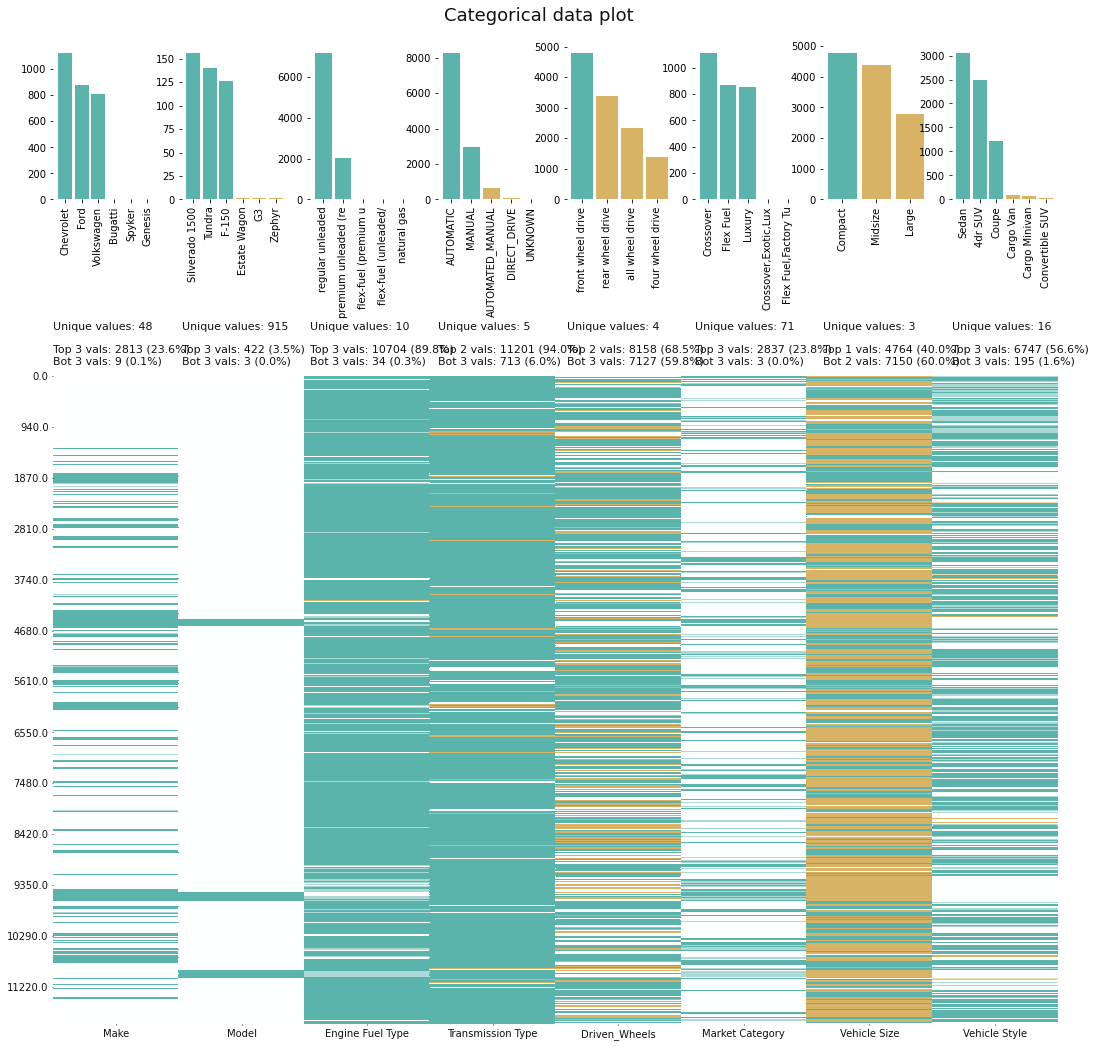

In [11]:
klib.cat_plot(data)

In [12]:
klib.corr_mat(data)

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.00,0.35,-0.04,0.26,0.26,0.20,0.07,0.23
Engine HP,0.35,1.00,0.78,-0.10,-0.41,-0.44,0.04,0.66
Engine Cylinders,-0.04,0.78,1.00,-0.14,-0.62,-0.60,0.04,0.53
Number of Doors,0.26,-0.10,-0.14,1.00,0.12,0.12,-0.05,-0.13
highway MPG,0.26,-0.41,-0.62,0.12,1.00,0.89,-0.02,-0.16
city mpg,0.20,-0.44,-0.60,0.12,0.89,1.00,-0.00,-0.16
Popularity,0.07,0.04,0.04,-0.05,-0.02,-0.00,1.00,-0.05
MSRP,0.23,0.66,0.53,-0.13,-0.16,-0.16,-0.05,1.00


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

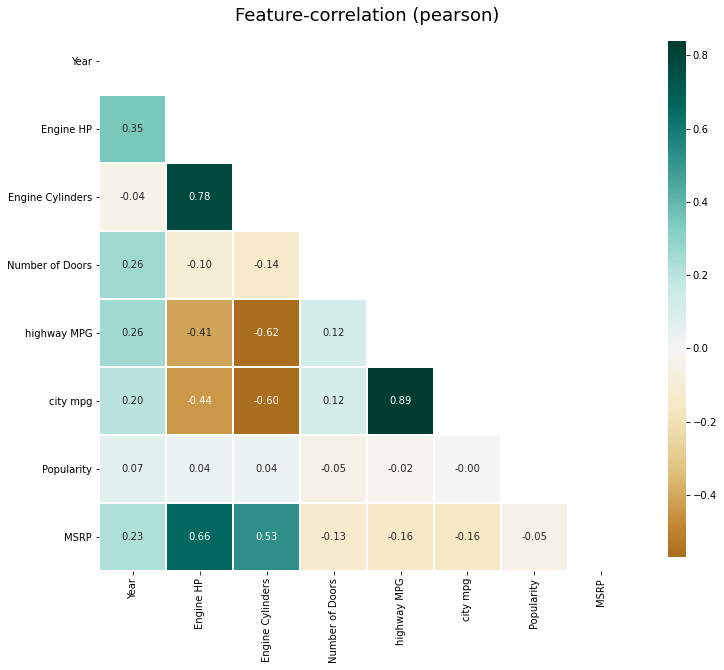

In [13]:
klib.corr_plot(data)

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='MSRP', ylabel='Density'>

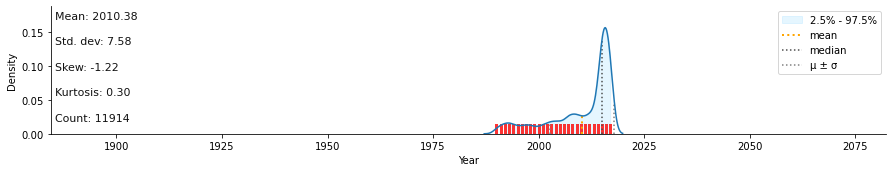

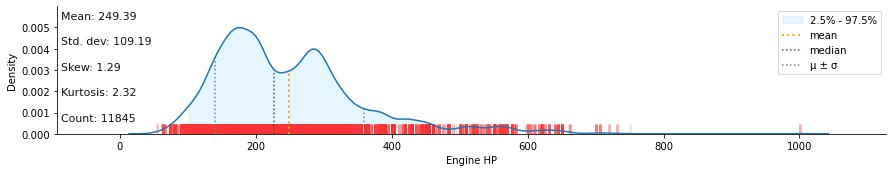

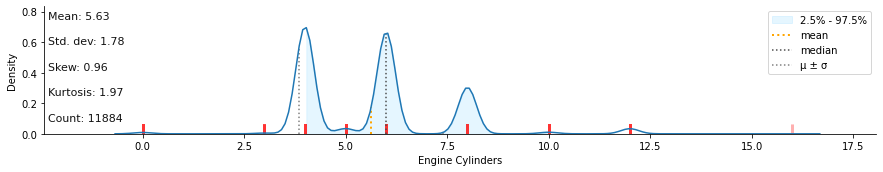

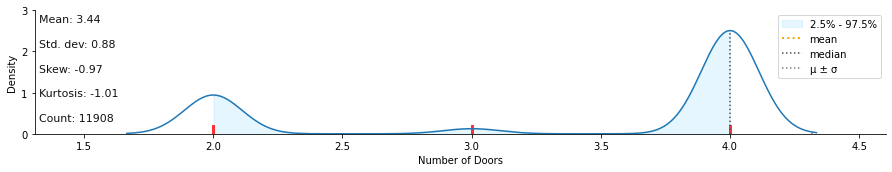

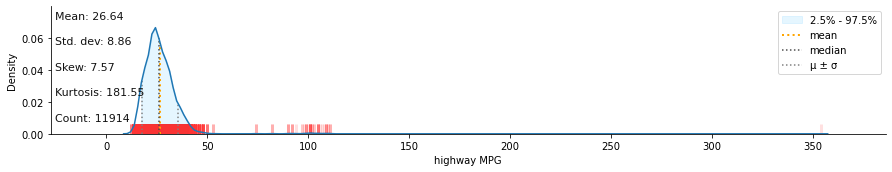

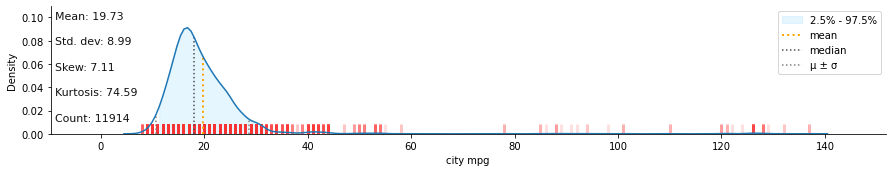

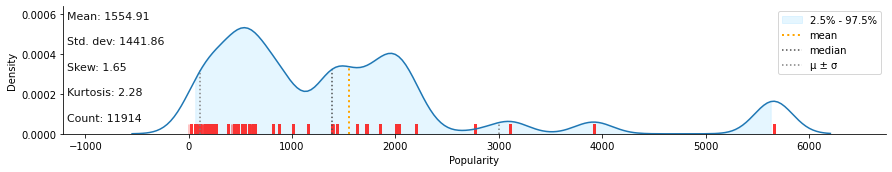

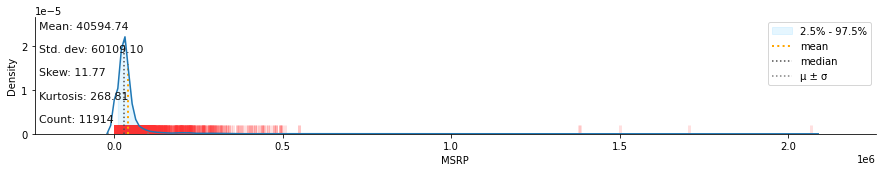

In [14]:
klib.dist_plot(data)

GridSpec(6, 6)

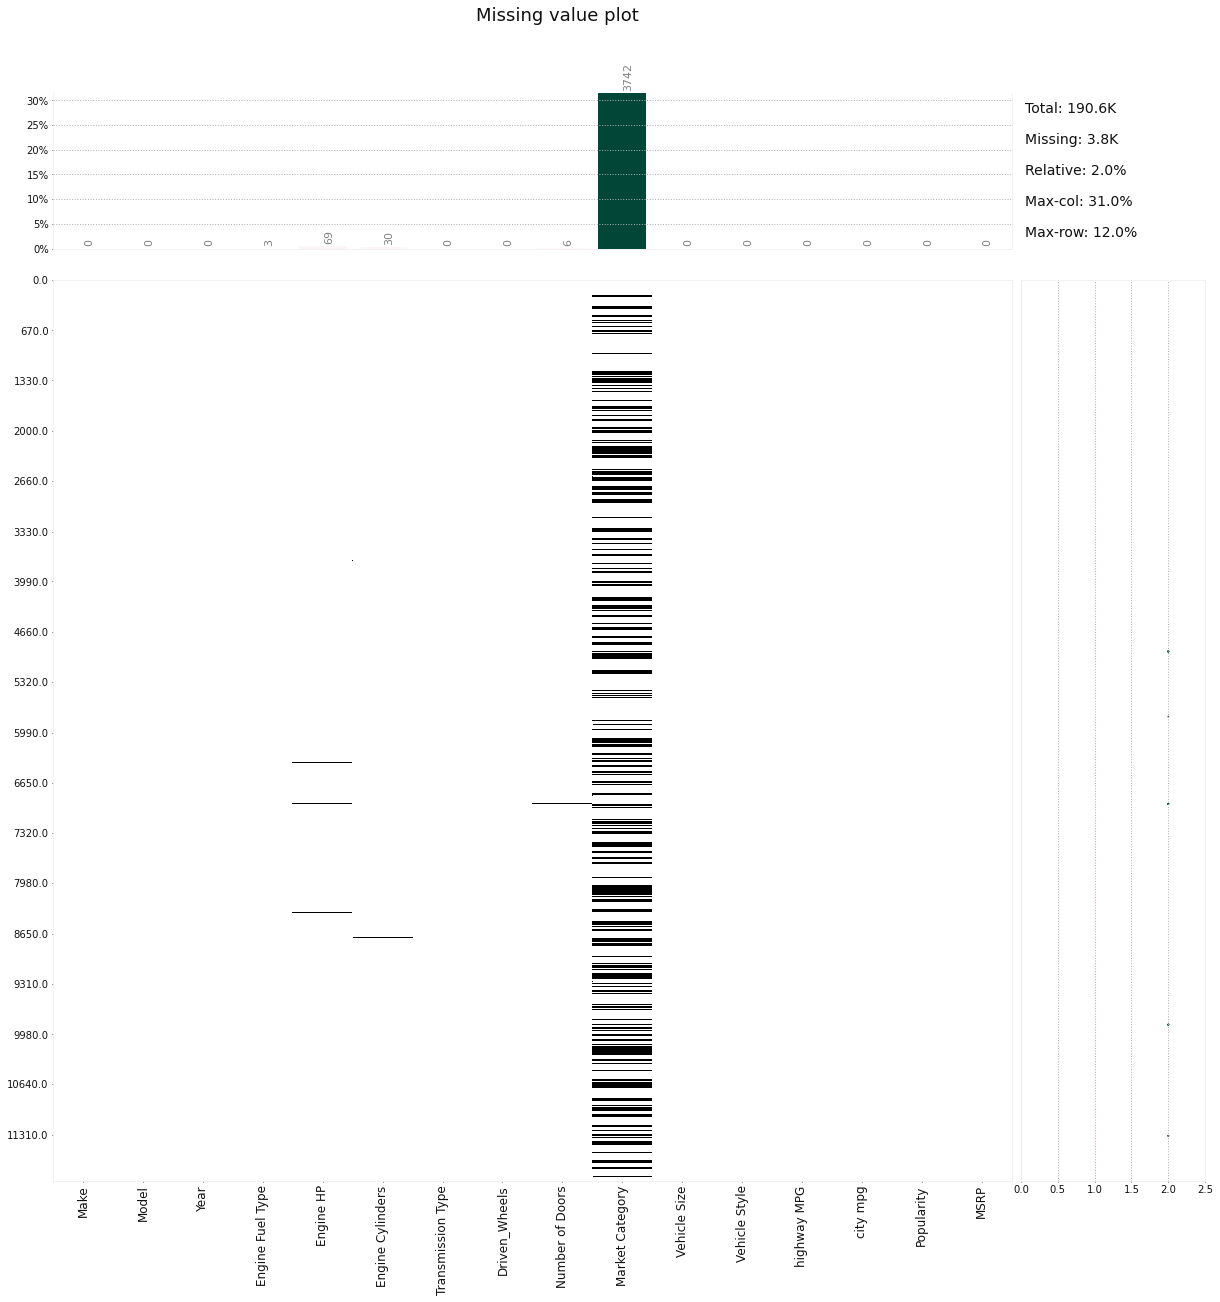

In [15]:
klib.missingval_plot(data)

## HANDALING MISSING VALUES

In [16]:
data['Engine HP'].isnull().value_counts()

False    11845
True        69
Name: Engine HP, dtype: int64

In [17]:
data['Engine Cylinders'].isnull().value_counts()

False    11884
True        30
Name: Engine Cylinders, dtype: int64

In [18]:
mean1=data['Engine HP'].mean()
data['Engine HP'].fillna(value=mean1,inplace=True)

In [19]:
mean2=data['Engine Cylinders'].mean()
data['Engine Cylinders'].fillna(value=mean2,inplace=True)

In [20]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [21]:
data['Engine Fuel Type'].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'electric',
       'flex-fuel (premium unleaded recommended/E85)', 'natural gas',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)', nan], dtype=object)

In [22]:
data.loc[data['Engine Fuel Type'].isnull()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,20199
11323,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,18499


In [23]:
from scipy.stats import mode

In [27]:
Engine_Fuel_Type  = data.pivot_table(values='Engine Fuel Type',
                                   columns='Model',
                                   aggfunc=lambda x: x.mode().iat[0])
miss_bool_Fuel_Type = data['Engine Fuel Type'].isnull() 
data.loc[miss_bool_Fuel_Type,'Engine Fuel Type'] = data.loc[miss_bool_Fuel_Type,'Model'].apply(lambda x: Engine_Fuel_Type[x])

In [29]:
data.loc[miss_bool_Fuel_Type,'Engine Fuel Type']

11321    regular unleaded
11322    regular unleaded
11323    regular unleaded
Name: Engine Fuel Type, dtype: object

In [30]:
market_category  = data.pivot_table(values='Market Category',
                                   columns='Make',
                                   aggfunc=lambda x: x.mode().iat[0])
miss_bool_market = data['Market Category'].isnull() 
data.loc[miss_bool_market,'Market Category'] = data.loc[miss_bool_market,'Make'].apply(lambda x: market_category[x])

In [31]:
data.loc[miss_bool_market,'Market Category'].unique()

array(['High-Performance', 'Flex Fuel', 'Crossover', 'Hatchback',
       'Performance', 'Hatchback,Performance'], dtype=object)

In [32]:
data['Market Category'].value_counts()

Flex Fuel                                          2828
Crossover                                          2100
Performance                                         857
Luxury                                              855
Hatchback                                           717
                                                   ... 
Exotic,Luxury,High-Performance,Hybrid                 1
Performance,Hybrid                                    1
Crossover,Exotic,Luxury,Performance                   1
Crossover,Exotic,Luxury,High-Performance              1
Flex Fuel,Factory Tuner,Luxury,High-Performance       1
Name: Market Category, Length: 71, dtype: int64

## CREATING DUMMY VARIABLE FOR COLUMN{MARKET_ CATEGARY}

In [33]:
df = data['Market Category'].str.get_dummies(sep=',')
df.head()

,Crossover,Diesel,Exotic,Factory Tuner,Flex Fuel,Hatchback,High-Performance,Hybrid,Luxury,Performance
0,0,0,0,1,0,0,1,0,1,0
1,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,1,0,1,0
3,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,1,0


In [34]:
data = pd.concat([data, df], axis=1)

In [35]:
data=data.drop('Market Category',axis=1)

In [36]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,...,Crossover,Diesel,Exotic,Factory Tuner,Flex Fuel,Hatchback,High-Performance,Hybrid,Luxury,Performance
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,0,1,0,0,1,0,1,0
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,0,0,0,0,0,0,1,1
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,0,0,0,0,1,0,1,0
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,0,0,0,0,0,0,1,1
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,0,0,0,0,0,0,1,0


In [37]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Vehicle Size', 'Vehicle Style', 'highway MPG',
       'city mpg', 'Popularity', 'MSRP', 'Crossover', 'Diesel', 'Exotic',
       'Factory Tuner', 'Flex Fuel', 'Hatchback', 'High-Performance', 'Hybrid',
       'Luxury', 'Performance'],
      dtype='object')

# DATA_FOR TRAINING

In [38]:
X=data.drop('MSRP',axis=1)
Y=data['MSRP']

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Make'] = le.fit_transform(X['Make'])
category = []
category.append('Make')

In [40]:
X.Make.value_counts()
X['Model'] = le.fit_transform(X['Model'])
category.append('Model')

In [41]:
X['Year'] = pd.qcut(X['Year'], 5, labels=False)
category.append('Year')

In [42]:
category.append('Engine Fuel Type')

In [43]:
X.loc[X['Engine Fuel Type'] == 'regular unleaded', 'Engine Fuel Type'] = 'regular'
X.loc[X['Engine Fuel Type'] == 'premium unleaded (required)', 'Engine Fuel Type'] = 'premium'
X.loc[X['Engine Fuel Type'] == 'premium unleaded (recommended)', 'Engine Fuel Type'] = 'premium'
X.loc[X['Engine Fuel Type'] == 'flex-fuel (unleaded/E85)', 'Engine Fuel Type'] = 'flex-fuel'
X.loc[X['Engine Fuel Type'] == 'flex-fuel (premium unleaded required/E85)', 'Engine Fuel Type'] = 'flex-fuel'
X.loc[X['Engine Fuel Type'] == 'flex-fuel (premium unleaded recommended/E85)', 'Engine Fuel Type'] = 'flex-fuel'
X.loc[X['Engine Fuel Type'] == 'flex-fuel (unleaded/natural gas)', 'Engine Fuel Type'] = 'flex-fuel'

In [44]:
X['Engine Fuel Type'] = le.fit_transform(X['Engine Fuel Type'])

In [45]:
X['Transmission Type'] = le.fit_transform(X['Transmission Type'])
category.append('Transmission Type')

In [46]:
X['Driven_Wheels'].value_counts()
X['Driven_Wheels'] = le.fit_transform(X['Driven_Wheels'])
category.append('Driven_Wheels')

In [47]:
X['Vehicle Size'].value_counts()
X['Vehicle Size'] = le.fit_transform(X['Vehicle Size'])
category.append('Vehicle Size')

In [48]:
X['Vehicle Style'].value_counts()
X['Vehicle Style'] = le.fit_transform(X['Vehicle Style'])
category.append('Vehicle Style')

In [49]:
category

['Make',
 'Model',
 'Year',
 'Engine Fuel Type',
 'Transmission Type',
 'Driven_Wheels',
 'Vehicle Size',
 'Vehicle Style']

## DROPING THE CATEGORY COLUMNS

In [50]:
for count in category:
     X=X.drop(count,axis=1)

In [51]:
X.head()

,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,Crossover,Diesel,Exotic,Factory Tuner,Flex Fuel,Hatchback,High-Performance,Hybrid,Luxury,Performance
0,335.0,6.0,2.0,26,19,3916,0,0,0,1,0,0,1,0,1,0
1,300.0,6.0,2.0,28,19,3916,0,0,0,0,0,0,0,0,1,1
2,300.0,6.0,2.0,28,20,3916,0,0,0,0,0,0,1,0,1,0
3,230.0,6.0,2.0,28,18,3916,0,0,0,0,0,0,0,0,1,1
4,230.0,6.0,2.0,28,18,3916,0,0,0,0,0,0,0,0,1,0


## MODEL_TESTING_ TRANING_DATA

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30)

In [53]:
X_train.isnull().sum()

Engine HP           0
Engine Cylinders    0
Number of Doors     5
highway MPG         0
city mpg            0
Popularity          0
Crossover           0
Diesel              0
Exotic              0
Factory Tuner       0
Flex Fuel           0
Hatchback           0
High-Performance    0
Hybrid              0
Luxury              0
Performance         0
dtype: int64

In [55]:
X_train['Number of Doors'].isnull().sum()

5

In [56]:
X_train['Number of Doors'].fillna(3.0, inplace = True)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [57]:
X_train['Number of Doors'].isnull().sum()

0

In [58]:
from sklearn.tree import DecisionTreeRegressor
dtr= DecisionTreeRegressor()
dtr.fit(X_train,Y_train)

DecisionTreeRegressor()

In [59]:
X_test['Number of Doors'].fillna(3.0, inplace = True)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [60]:
Y_pred = dtr.predict(X_test)

In [61]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(Y_test, Y_pred)

148707024.6145208

In [62]:
y_pred_train = dtr.predict(X_train)

In [63]:
mean_squared_error(Y_train, y_pred_train)

155283017.3554598

In [64]:
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [69]:
from sklearn.linear_model import  LinearRegression
Lr =  LinearRegression()
Lr.fit(X_train,Y_train)

LinearRegression()

In [70]:
rr = Ridge(alpha=0.01)

linear regression train score: 0.6009970233487179
linear regression test score: 0.6451125079710657
ridge regression train score low alpha: 0.6009970230569919
ridge regression test score low alpha: 0.6451144828528479
ridge regression train score high alpha: 0.5876955975012983
ridge regression test score high alpha: 0.6406287281169316


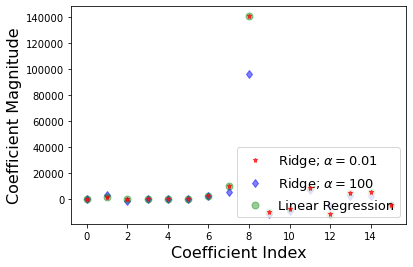

In [73]:
rr.fit(X_train, Y_train)
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, Y_train)
train_score=Lr.score(X_train, Y_train)
test_score=Lr.score(X_test, Y_test)
Ridge_train_score = rr.score(X_train,Y_train)
Ridge_test_score = rr.score(X_test, Y_test)
Ridge_train_score100 = rr100.score(X_train,Y_train)
Ridge_test_score100 = rr100.score(X_test, Y_test)


print ("linear regression train score:", train_score)
print ("linear regression test score:", test_score)
print ("ridge regression train score low alpha:", Ridge_train_score)
print ("ridge regression test score low alpha:", Ridge_test_score)
print ("ridge regression train score high alpha:", Ridge_train_score100)
print ("ridge regression test score high alpha:", Ridge_test_score100)
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(Lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

training score: 0.6009969687681658
test score:  0.6451234110835342
number of features used:  16
training score for alpha=0.01: 0.6009970233432591
test score for alpha =0.01:  0.6451126177874323
number of features used: for alpha =0.01: 16
training score for alpha=0.0001: 0.6009970233487172
test score for alpha =0.0001:  0.645112509071094
number of features used: for alpha =0.0001: 16
LR training score: 0.6009970233487179
LR test score:  0.6451125079710657


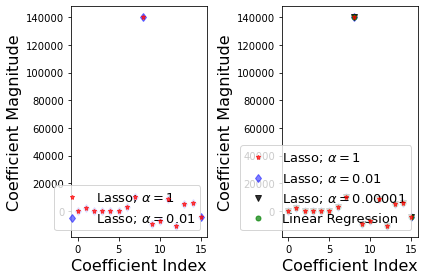

In [74]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,Y_train)
train_score=lasso.score(X_train,Y_train)
test_score=lasso.score(X_test,Y_test)
coeff_used = np.sum(lasso.coef_!=0)
print ("training score:", train_score )
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,Y_train)
train_score001=lasso001.score(X_train,Y_train)
test_score001=lasso001.score(X_test,Y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print ("training score for alpha=0.01:", train_score001 )
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,Y_train)
train_score00001=lasso00001.score(X_train,Y_train)
test_score00001=lasso00001.score(X_test,Y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print ("training score for alpha=0.0001:", train_score00001 )
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)
lr = LinearRegression()
lr.fit(X_train,Y_train)
lr_train_score=lr.score(X_train,Y_train)
lr_test_score=lr.score(X_test,Y_test)
print ("LR training score:", lr_train_score )
print ("LR test score: ", lr_test_score)
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

# THE END !!